In [23]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [24]:
from pathlib import Path
csvpath = Path('../Resources/oil_futures_front.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,100.51,100.51,100.51,100.51,0.96,100.51,25.0,12833.0
2014-02-19,100.83,100.83,100.83,100.83,0.32,100.83,0.0,12833.0
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0


<AxesSubplot:xlabel='Date'>

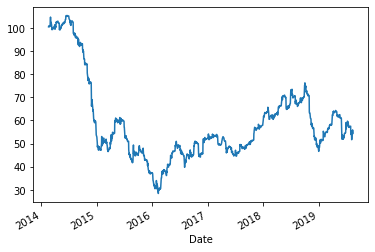

In [25]:
df.Settle.plot()

<AxesSubplot:xlabel='Date'>

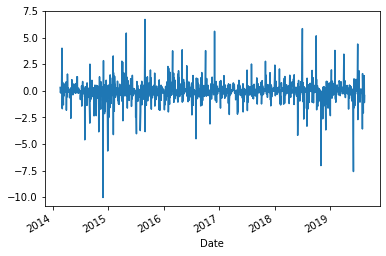

In [26]:
# Differencing the Settle price stationarizes the time series
df.Settle.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

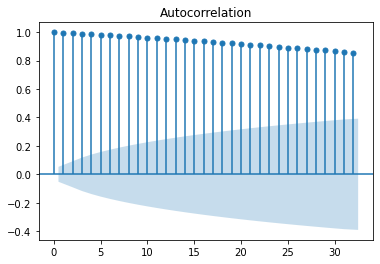

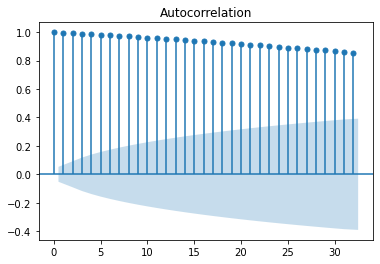

In [28]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df.Settle)

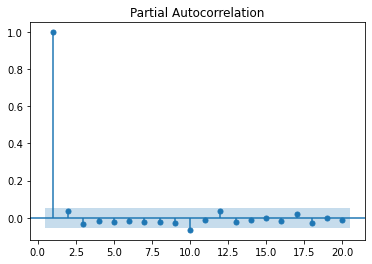

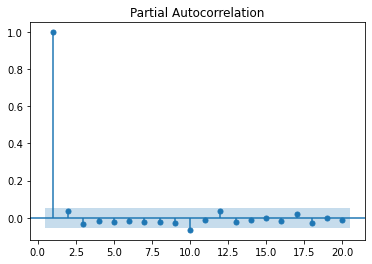

In [29]:
# Plot the partial autocorrelation of the returns
plot_pacf(df.Settle,zero=False, lags=20)

# ARIMA Model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
# Create an ARIMA model
model= ARIMA(df.Settle, order=(1,1,1))

/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been pr

In [32]:
# Fit the model to the data
result=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41006D+00    |proj g|=  1.19305D-04

At iterate    5    f=  1.41006D+00    |proj g|=  8.18678D-05

At iterate   10    f=  1.41006D+00    |proj g|=  9.65894D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   6.661D-08   1.410D+00
  F =   1.4100581287659293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [35]:
# Print the model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 1380
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1945.880
Method:                       css-mle   S.D. of innovations              0.991
Date:                Mon, 14 Feb 2022   AIC                           3899.760
Time:                        20:56:48   BIC                           3920.680
Sample:                             1   HQIC                          3907.586
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0334      0.025     -1.328      0.184      -0.083       0.016
ar.L1.D.Settle    -0.4478      0.205     -2.186      0.029      -0.849      -0.046
ma.L1.D.Settle     0.3661      0.213      1.721      0.085      -0.051       0.783
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2332           +0.0000j            2.2332            0.5000
MA.1           -2.7312           +0.0000j            2.7312            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Future of Oil prices'}>

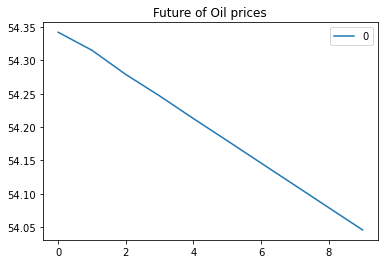

In [36]:
# Plot the Futures Price Forecast
pd.DataFrame(result.forecast(steps=10)[0]).plot(title="Future of Oil prices")

In [40]:
model2= ARIMA(df.Settle, order=(1,2,1))

/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/enriquebriceno/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been pr

In [41]:
result2= model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41181D+00    |proj g|=  8.82212D-03

At iterate    5    f=  1.41180D+00    |proj g|=  1.94886D-02

At iterate   10    f=  1.41178D+00    |proj g|=  1.79061D-03
  ys=-1.492E-15  -gs= 1.777E-13 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     32      1     1     0   2.220D-07   1.412D+00
  F =   1.4117803280691490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<AxesSubplot:title={'center':'Future of Oil prices'}>

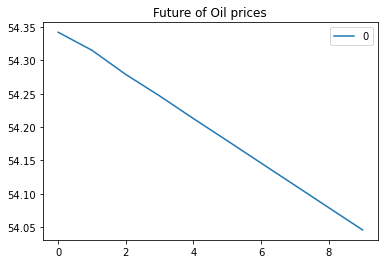

In [42]:
pd.DataFrame(result.forecast(steps=10)[0]).plot(title="Future of Oil prices")

In [45]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Settle   No. Observations:                 1379
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1946.845
Method:                       css-mle   S.D. of innovations              0.992
Date:                Mon, 14 Feb 2022   AIC                           3901.690
Time:                        21:02:02   BIC                           3922.607
Sample:                             2   HQIC                          3909.515
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.528e-05      0.001     -0.076      0.940      -0.001       0.001
ar.L1.D2.Settle    -0.1026      0.029     -3.566      0.000      -0.159      -0.046
ma.L1.D2.Settle    -0.9761      0.012    -81.121      0.000      -1.000      -0.953
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.7471           +0.0000j            9.7471            0.5000
MA.1            1.0245           +0.0000j            1.0245            0.0000
-----------------------------------------------------------------------------
"""